In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 200)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib
from tqdm import tqdm

In [2]:
df = joblib.load('data_before_pca.sav')
df.head()

,age,bmi,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_wbc_max,d1_wbc_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,apache_3j_bodysystem,apache_2_bodysystem,temp_apache,d1_spo2_max,d1_spo2_min,d1_temp_min,h1_spo2_max,h1_spo2_min,h1_temp_min,d1_sodium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,hospital_death
0,68.0,3.166740,180.3,0.432864,4.316154,113.0,6.220610,0.0,3.465736,1.255616,3.000000,6.000000,0.000000,4.000000,5.129899,118.0,27.400000,0.0,40.0,36.0,134.000000,0.0,2.714695,4.234107,37.0,4.234107,37.0,119.0,72.0,4.499810,46.0,4.499810,46.0,3.555348,10.0,131.0,73.0,131.0,73.0,3.680704,68.0,63.0,68.000000,63.000000,119.0,108.0,86.0,85.0,86.000000,85.000000,3.295837,2.944439,131.0,115.0,131.000000,115.000000,39.500000,3.465736,3.433987,8.500000,7.400000,1.255616,1.172482,5.129899,4.700480,19.0000,15.000000,8.900000,8.900000,27.40000,27.400000,5.455321,5.455321,1.609438,3.400000,136.000000,2.714695,2.714695,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,77.0,3.347093,160.0,0.656368,4.265493,108.0,5.318169,0.0,2.302585,0.444686,1.000000,3.000000,0.000000,1.000000,4.983607,120.0,36.900000,0.0,46.0,33.0,145.000000,1.0,2.617396,4.564348,31.0,4.564348,31.0,118.0,72.0,4.795791,38.0,4.795791,38.0,3.496508,12.0,159.0,67.0,159.0,67.0,3.618993,61.0,48.0,61.000000,48.000000,114.0,100.0,85.0,57.0,85.000000,57.000000,3.465736,3.367296,95.0,71.0,95.000000,71.000000,36.300000,2.484907,2.302585,8.600000,8.000000,0.536493,0.444686,4.983607,4.859812,27.0000,26.000000,11.300000,11.100000,36.90000,36.100000,6.118100,6.110924,1.648659,3.800000,145.000000,3.190476,2.617396,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,2,1,1,1,2,1,2,2,2,1,1,2,2,1,2,2,1,1,0
2,25.0,3.494991,172.7,0.000694,4.567468,122.0,6.556821,0.0,3.289347,0.908264,3.000000,6.000000,0.000000,5.000000,5.083432,102.0,32.988739,0.0,68.0,37.0,137.966373,0.0,2.575153,4.488636,48.0,4.488636,48.0,96.0,68.0,4.634729,68.0,4.634729,68.0,3.091042,8.0,148.0,105.0,148.0,105.0,3.637586,88.0,58.0,88.000000,58.000000,96.0,78.0,91.0,83.0,91.000000,83.000000,3.044522,2.833213,148.0,124.0,148.000000,124.000000,36.700000,3.284130,3.209531,8.378881,8.179575,0.911740,0.861601,5.168425,4.748239,24.3665,23.170486,11.448195,10.887875,34.53197,32.951813,5.338046,5.287104,1.658532,3.934658,139.124101,2.600933,2.510699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,2,2,1,2,1,3,3,1,2,1,1,2,1,1,2,2,2,0
3,81.0,3.162940,165.1,0.000694,4.138361,203.0,7.095918,0.0,3.289347,0.908264,4.000000,6.000000,0.000000,5.000000,5.225747,114.0,25.900000,1.0,60.0,4.0,137.966373,1.0,2.197225,3.919078,42.0,3.919078,42.0,116.0,92.0,4.442651,84.0,4.442651,84.0,3.178054

# Dimensionality Reduction 

In [5]:
# Splitting features
y = df['hospital_death']
X = df.drop(columns=['hospital_death'], axis=1)

# Scaling the dataframe
from sklearn.preprocessing import StandardScaler

pca_scaler = StandardScaler()
pca_scaler.fit_transform(X)

# Creating PCA retaining 95% explained variance
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, whiten=True)
df_pca = pca.fit_transform(df)

# Results
print("Original number of features: ", df.shape[1])
print("Reduced number of features: ", df_pca.shape[1])

Original number of df:  107
Reduced number of df:  11


In [17]:
# Creating dataframe of principal components

columns = [f"PC{n}" for n in range(1, 1+df_pca.shape[1])]
data = pd.DataFrame(df_pca, columns=columns)
print(data.shape)
data.head()

(167596, 11)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.846418,0.021234,0.340837,-0.830952,1.052555,0.229546,-1.188913,0.445605,0.317656,0.348034,0.852899
1,-1.233795,-0.564731,0.531949,0.564780,0.576600,-0.568406,0.280363,-1.634517,0.984232,-0.644580,0.760763
2,-0.337021,0.661954,-0.433876,-0.521133,0.516651,0.061237,0.643491,0.183273,-0.446542,1.188594,-1.183072
3,0.266326,-0.222720,0.299437,-0.369473,0.554406,-0.815595,0.592430,0.003428,0.635472,-0.547382,-0.412851
4,-0.153769,0.997330,-1.130017,-0.447779,-0.680553,1.122279,1.461575,-0.921927,0.641250,2.329634,-0.830944


# Baseline Model

In [18]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data, y, test_size=0.15, random_state=42)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(142456, 11) (25140, 11) (142456,) (25140,)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_X_scaled= scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# saving scalar
import joblib
joblib.dump(scaler, "scaler.sav")

['scaler.sav']

In [22]:
# To know the best baseline model
def best_model(models, X, y, nsplits=10, scoring ='accuracy'):
    from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
    
    results=[]
    names = []

    for name, model in models:
        kfold = RepeatedStratifiedKFold(n_splits=nsplits, n_repeats=2)
        cv_results = cross_val_score(model, 
                                     X, y, 
                                     cv=kfold, 
                                     scoring=scoring)
        results.append(cv_results)
        names.append(name)
        plot_dict = dict(zip(names, results))
        msg = f"{name} >> Mean score:{round(cv_results.mean(),3)},\
        Range:{(round(cv_results.max(),5) - round(cv_results.min(),5)):0.3f},\
            Max score:{round(cv_results.max(),3)}"
        print(msg)

    # boxplot of models for comparison
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig = plt.figure(figsize=(10,5))
    fig.suptitle('Comparison of base models', fontsize=20)
    ax = fig.add_subplot(111)
    mean_props=dict(marker="D", 
                    markersize=7, 
                    markerfacecolor='salmon', 
                    markeredgecolor='black', 
                    linewidth=2)
    box = plt.boxplot(results, 
                      vert=False, 
                      showmeans=True, 
                      meanprops=mean_props,
                      medianprops=dict(markeredgecolor='black'),
                      patch_artist=True)
    
    colors = ['mistyrose', 'lightgoldenrodyellow', 'lavender', 'papayawhip', 'lightgreen', 'thistle']
    
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        
    ax.set_yticklabels(names)
    ax.set_xlabel("Accuracy")
    plt.savefig('baseline_model_comparison.png')
    plt.show()

In [23]:
# Feeding some base models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier(eval_metric='logloss')))
models.append(('LGBM', LGBMClassifier()))
models.append(('LOG', LogisticRegression()))

  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

 KFolds = 5  

KNN >> Mean score:0.854,        Range:0.007,            Max score:0.858
RF >> Mean score:0.906,        Range:0.005,            Max score:0.908
XGB >> Mean score:0.766,        Range:0.007,            Max score:0.769
LGBM >> Mean score:0.737,        Range:0.006,            Max score:0.741
LOG >> Mean score:0.697,        Range:0.007,            Max score:0.699


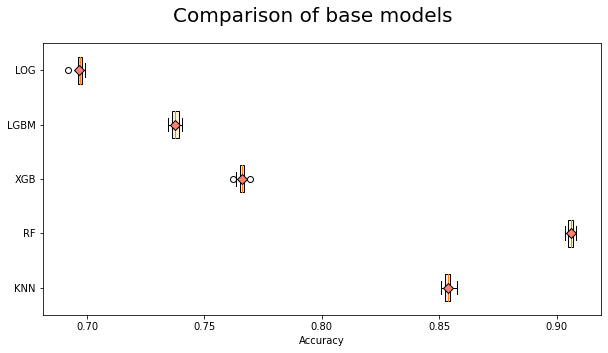

  9%|███████▎                                                                        | 1/11 [08:20<1:23:29, 500.94s/it]

 KFolds = 6  

KNN >> Mean score:0.856,        Range:0.004,            Max score:0.858
RF >> Mean score:0.908,        Range:0.006,            Max score:0.911
XGB >> Mean score:0.764,        Range:0.013,            Max score:0.769
LGBM >> Mean score:0.737,        Range:0.008,            Max score:0.742
LOG >> Mean score:0.697,        Range:0.011,            Max score:0.702


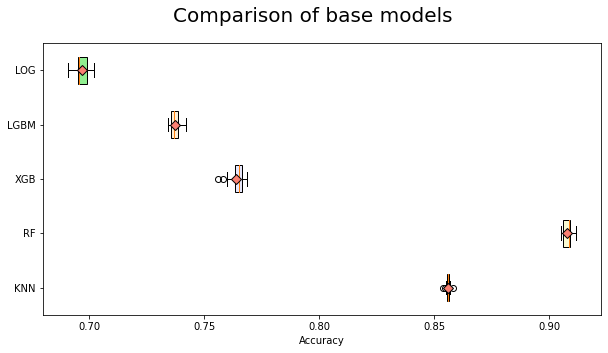

 18%|██████████████▌                                                                 | 2/11 [18:27<1:24:28, 563.21s/it]

 KFolds = 7  

KNN >> Mean score:0.856,        Range:0.007,            Max score:0.859
RF >> Mean score:0.91,        Range:0.008,            Max score:0.914
XGB >> Mean score:0.766,        Range:0.006,            Max score:0.768
LGBM >> Mean score:0.737,        Range:0.013,            Max score:0.745
LOG >> Mean score:0.697,        Range:0.008,            Max score:0.701


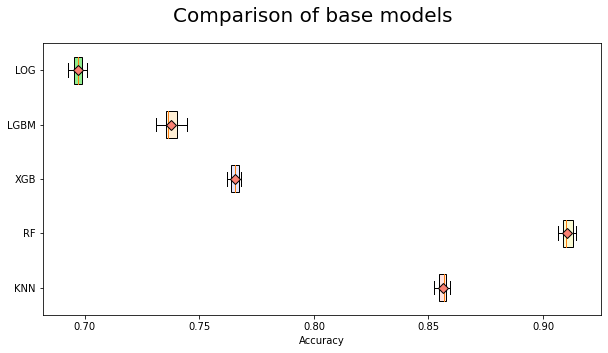

 27%|█████████████████████▊                                                          | 3/11 [30:37<1:25:14, 639.32s/it]

 KFolds = 8  

KNN >> Mean score:0.858,        Range:0.010,            Max score:0.862
RF >> Mean score:0.911,        Range:0.007,            Max score:0.914
XGB >> Mean score:0.766,        Range:0.014,            Max score:0.773
LGBM >> Mean score:0.738,        Range:0.012,            Max score:0.745
LOG >> Mean score:0.697,        Range:0.009,            Max score:0.702


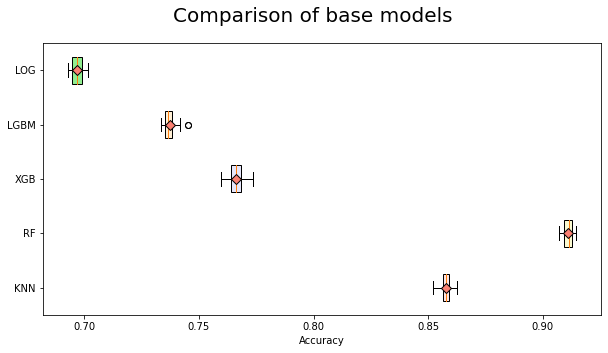

 36%|█████████████████████████████                                                   | 4/11 [44:34<1:23:42, 717.48s/it]

 KFolds = 9  

KNN >> Mean score:0.858,        Range:0.008,            Max score:0.862
RF >> Mean score:0.912,        Range:0.008,            Max score:0.916
XGB >> Mean score:0.766,        Range:0.009,            Max score:0.771
LGBM >> Mean score:0.738,        Range:0.015,            Max score:0.746
LOG >> Mean score:0.697,        Range:0.012,            Max score:0.704


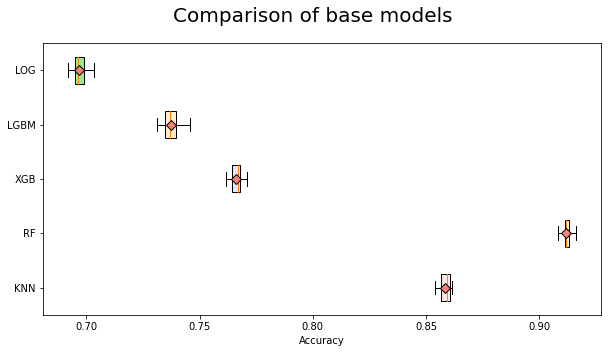

 45%|████████████████████████████████████▎                                           | 5/11 [59:52<1:18:58, 789.67s/it]

 KFolds = 10  

KNN >> Mean score:0.859,        Range:0.013,            Max score:0.866
RF >> Mean score:0.913,        Range:0.010,            Max score:0.919
XGB >> Mean score:0.765,        Range:0.014,            Max score:0.773
LGBM >> Mean score:0.737,        Range:0.012,            Max score:0.743
LOG >> Mean score:0.697,        Range:0.018,            Max score:0.709


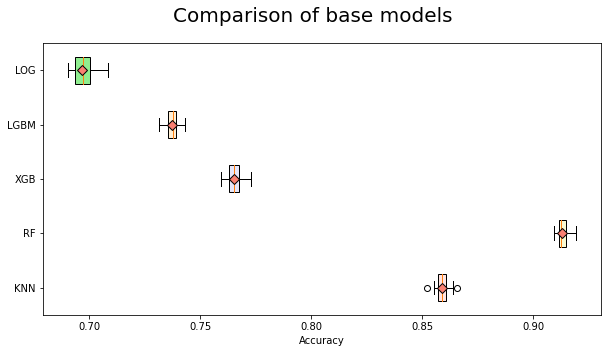

 55%|██████████████████████████████████████████▌                                   | 6/11 [1:16:58<1:12:29, 869.86s/it]

 KFolds = 11  

KNN >> Mean score:0.86,        Range:0.009,            Max score:0.865
RF >> Mean score:0.913,        Range:0.007,            Max score:0.917
XGB >> Mean score:0.766,        Range:0.014,            Max score:0.773
LGBM >> Mean score:0.738,        Range:0.014,            Max score:0.748
LOG >> Mean score:0.697,        Range:0.017,            Max score:0.707


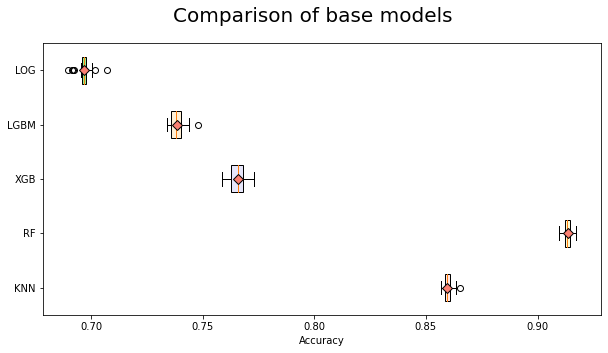

 64%|█████████████████████████████████████████████████▋                            | 7/11 [1:35:32<1:03:19, 949.95s/it]

 KFolds = 12  

KNN >> Mean score:0.86,        Range:0.015,            Max score:0.867
RF >> Mean score:0.914,        Range:0.011,            Max score:0.92
XGB >> Mean score:0.766,        Range:0.016,            Max score:0.775
LGBM >> Mean score:0.738,        Range:0.014,            Max score:0.745
LOG >> Mean score:0.697,        Range:0.022,            Max score:0.704


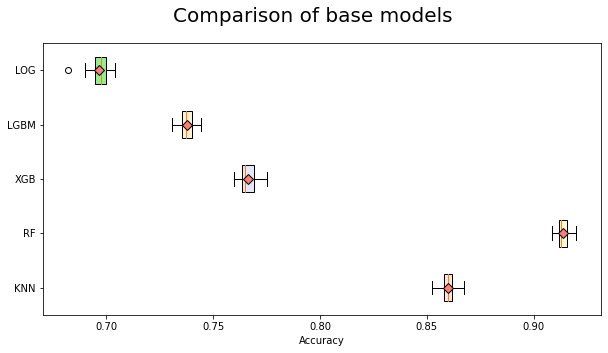

 73%|█████████████████████████████████████████████████████████▍                     | 8/11 [1:55:46<51:41, 1033.89s/it]

 KFolds = 13  

KNN >> Mean score:0.86,        Range:0.011,            Max score:0.866
RF >> Mean score:0.914,        Range:0.007,            Max score:0.918
XGB >> Mean score:0.766,        Range:0.018,            Max score:0.774
LGBM >> Mean score:0.738,        Range:0.013,            Max score:0.744
LOG >> Mean score:0.697,        Range:0.020,            Max score:0.71


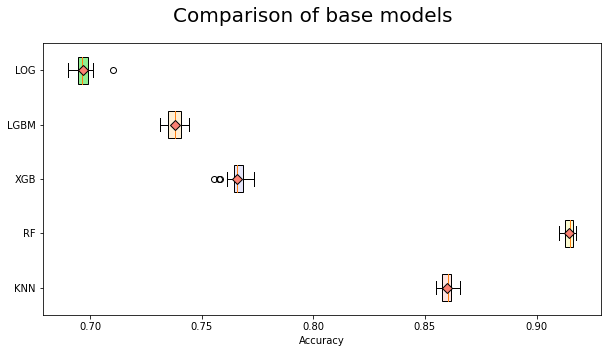

 82%|████████████████████████████████████████████████████████████████▋              | 9/11 [2:17:44<37:25, 1122.66s/it]

 KFolds = 14  

KNN >> Mean score:0.861,        Range:0.010,            Max score:0.865
RF >> Mean score:0.915,        Range:0.009,            Max score:0.919
XGB >> Mean score:0.767,        Range:0.020,            Max score:0.773
LGBM >> Mean score:0.738,        Range:0.020,            Max score:0.745
LOG >> Mean score:0.697,        Range:0.016,            Max score:0.705


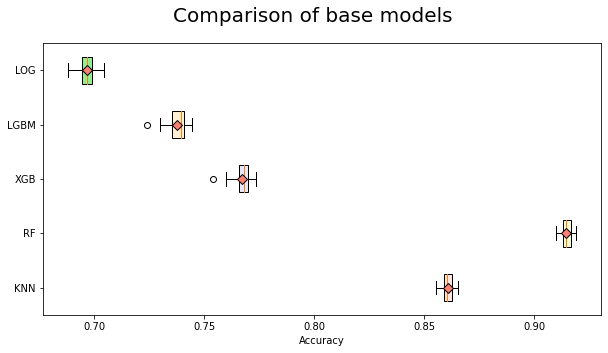

 91%|██████████████████████████████████████████████████████████████████████▉       | 10/11 [2:42:15<20:30, 1230.22s/it]

 KFolds = 15  

KNN >> Mean score:0.861,        Range:0.018,            Max score:0.868
RF >> Mean score:0.915,        Range:0.011,            Max score:0.921
XGB >> Mean score:0.766,        Range:0.023,            Max score:0.776
LGBM >> Mean score:0.738,        Range:0.015,            Max score:0.747
LOG >> Mean score:0.697,        Range:0.025,            Max score:0.71


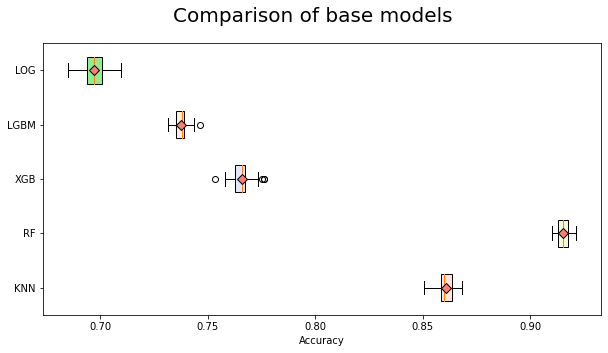

100%|██████████████████████████████████████████████████████████████████████████████| 11/11 [3:09:13<00:00, 1032.12s/it]

Wall time: 3h 9min 13s


In [28]:
%%time
# Finding the best baseline models on 5 to 15 fold cross validation
for s in tqdm(range(5,16)):
    print(f"\033[1m KFolds = {s} \033[0m", "\n")
    best_model(models, train_X_scaled, train_y, nsplits=s)

15 fold Random forest is giving the best result as of now.

In [31]:
from sklearn.model_selection import cross_val_score
# Function for calculating scores
def calculate_score(model):
    train_scores = cross_val_score(model, train_X_scaled, train_y, cv=15)
    test_scores = cross_val_score(model, test_X_scaled, test_y, cv=15)
    
    # Checking how the model fits the training data
    print("Accuracy on training data: ", np.round(np.mean(train_scores), 3))
    print("Accuracy on testing data: ", np.round(np.mean(test_scores), 3), "\n")

In [32]:
rfc = RandomForestClassifier()
calculate_score(rfc)

Accuracy on training data:  0.915
Accuracy on testing data:  0.8 



In [33]:
# saving model
joblib.dump(rfc, 'basemodel.sav')

['basemodel.sav']